<a href="https://colab.research.google.com/github/sjpozzuoli/Daves_Eagles/blob/Dave_Supple/unsupervised_group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
dataset.head()

,city,state,month,year,supply_score,demand_score,median_listing_price_yy,median_days_on_market_yy,unique_viewers_per_property_yy,mortgage_rate,date,date_month_num,hotness_rank_yy,hotness_rank
0,richmond,va,July,2021,31.832594,56.119214,0.034750,-0.385714,0.279070,2.18,2021-07-01,7,-207,958
1,lafayette,la,July,2021,14.204185,30.691186,-0.155556,-0.595420,0.600000,2.18,2021-07-01,7,80,1343
2,yuma,az,July,2021,85.225111,38.871275,0.169684,-0.542373,0.257143,2.18,2021-07-01,7,272,463
3,faribault,mn,July,2021,35.193405,32.847178,0.110883,0.000000,0.205882,2.18,2021-07-01,7,-785,1151
4,chicago,il,July,2021,82.371592,79.581484,-0.125039,-0.348837,-0.027027,2.18,2021-07-01,7,-116,164


In [4]:
X = dataset.iloc[:, [4, 5]].values

In [5]:
print(X)

[[31.83259353 56.1192137 ]
 [14.20418516 30.6911858 ]
 [85.22511097 38.87127457]
 ...
 [99.42929613 30.31071655]
 [58.14838301 50.03170577]
 [35.1934052  50.22194039]]


## Use Elbow Method to find the optimal number of clusters

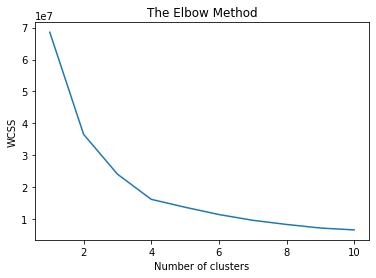

In [6]:

# Implement Elbow Method 
# Run the K-Means algo several times with a seperate number of clusters
from sklearn.cluster import KMeans

# For loop with K-Means for 10 different number of clusters (1-10)
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Train K-Means Model on the dataset

In [7]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [8]:
print(y_kmeans)

[3 1 2 ... 2 2 3]


## Visualize the Cluster

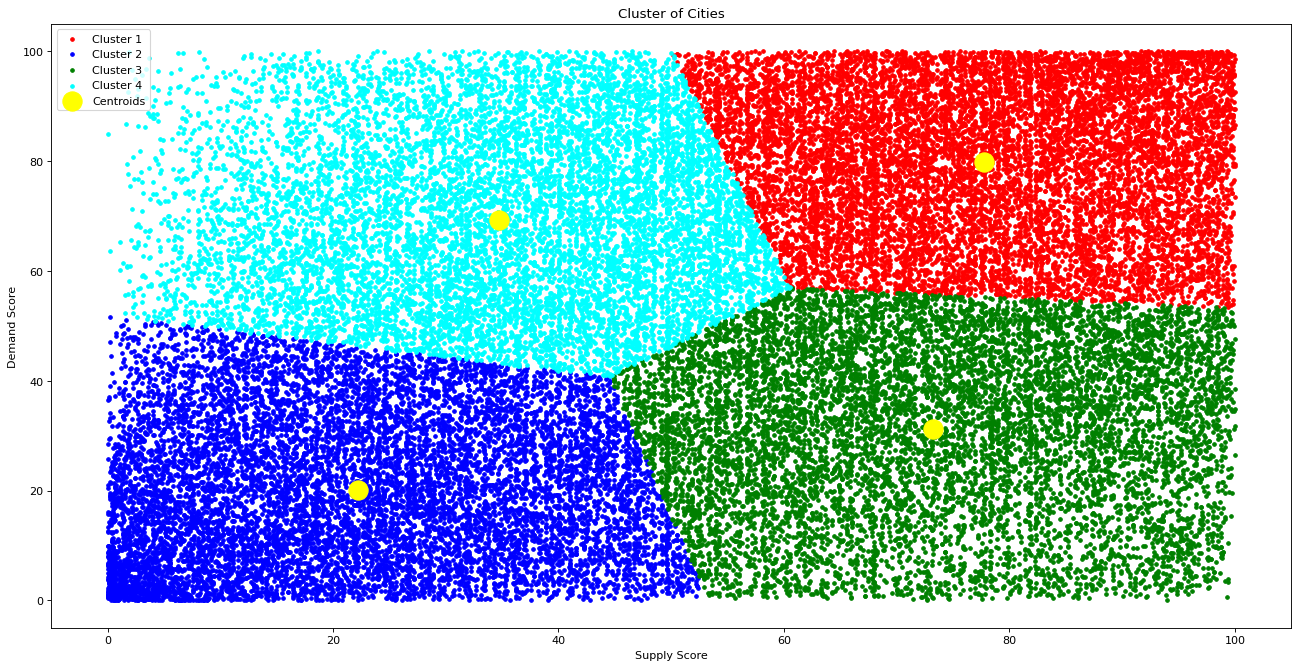

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')

# plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Cluster of Cities')
plt.xlabel('Supply Score')
plt.ylabel('Demand Score')
plt.legend()
plt.show()

## Add "class" column to dataset with clusters

In [12]:
dataset["class"] = kmeans.labels_

In [13]:
dataset.head()

,city,state,month,year,supply_score,demand_score,median_listing_price_yy,median_days_on_market_yy,unique_viewers_per_property_yy,mortgage_rate,date,date_month_num,hotness_rank_yy,hotness_rank,class
0,richmond,va,July,2021,31.832594,56.119214,0.034750,-0.385714,0.279070,2.18,2021-07-01,7,-207,958,3
1,lafayette,la,July,2021,14.204185,30.691186,-0.155556,-0.595420,0.600000,2.18,2021-07-01,7,80,1343,1
2,yuma,az,July,2021,85.225111,38.871275,0.169684,-0.542373,0.257143,2.18,2021-07-01,7,272,463,2
3,faribault,mn,July,2021,35.193405,32.847178,0.110883,0.000000,0.205882,2.18,2021-07-01,7,-785,1151,1
4,chicago,il,July,2021,82.371592,79.581484,-0.125039,-0.348837,-0.027027,2.18,2021-07-01,7,-116,164,0
